In [275]:
import numpy as np
import matplotlib.pyplot as plt

In [276]:
#Define initial parameters
L = 200
J = 1
kbt = 0.1
n_max = 1000000
n0 = 1


In [291]:
#Define initial state matrix with -1 and 1 
def init():
	initial_state = np.random.choice(([-1,1]), (L,L))
	return initial_state

In [278]:
def not_done(state):
    is_not_done = n0 < n_max
    return is_not_done


In [279]:
-J*4*200*200

-160000

In [280]:
#Calculate the energy, this function takes a matrix and and calculates the energy 
def energy(M, h=0):
	E1 = 0
	M1 = 0

	for i in range(len(M)):
		for n in range(len(M)):
			center = M[i,n]
			right = np.roll(M[i],-1)[n]
			left = np.roll(M[i],1)[n]
			lower = np.roll(M[:,n],-1)[i]
			upper = np.roll(M[:,n],1)[i]

			E1 += -J*center*(right+left+lower+upper)+h*center
			M1 += center
	return E1, M1


test_matrix = np.array([[1,2,3],[4,5,6],[7,8,9]])



energy(test_matrix)

(-960, 45)

In [281]:
def calc_energy(M,x,y, h=0):

	center = M[x,y]
	right = np.roll(M[x],-1)[y]
	left = np.roll(M[x],1)[y]
	lower = np.roll(M[:,y],-1)[x]
	upper = np.roll(M[:,y],1)[x]

	E = -J*center*(left+right+upper+lower)+h*center

	return E

calc_energy(test_matrix, 0, 2)


-27.0

In [282]:


def update(M, E, mag):
	m = np.random.randint(0,L)
	n = np.random.randint(0,L)
	u = np.random.random()

	current_energy = calc_energy(M,m,n)
	flipped_energy = -1*current_energy

	E_diff = (flipped_energy-current_energy)

	if np.exp(-E_diff/(kbt)) >= u:
		E += E_diff
		M[m,n] = M[m,n]*-1
		mag += 2*M[m,n]

	return M, E, mag

In [283]:
start_matrix = init()
start_energy,start_magnet = energy(start_matrix)

Energy_list = [start_energy] 
Magnet_list = [start_magnet]

while n0<n_max:
	temp = update(start_matrix,start_energy, start_magnet)
	Energy_list.append(temp[1])
	Magnet_list.append(temp[2])
	start_matrix, start_energy, start_magnet = temp

	n0 += 1



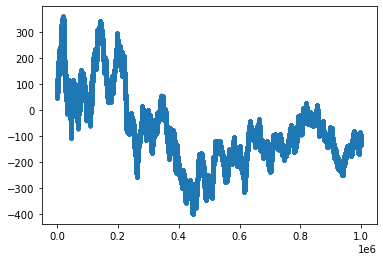

In [284]:
plt.plot(Magnet_list, '.')

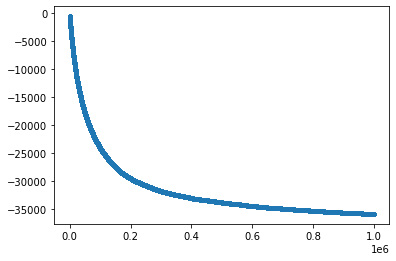

In [285]:
plt.plot(Energy_list, '.')

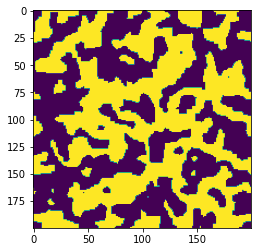

In [290]:
plt.imshow(start_matrix)

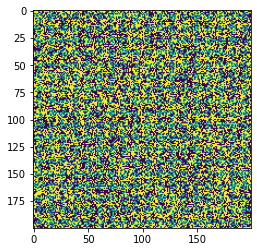

In [287]:
plt.imshow(init())

In [294]:
exp_E = []

for i in range():
	#print(i)
	#print(Energy_list[0:i+1])
	exp_E.append((1/n_max-i)*(np.sum(Energy_list[0:i+1])))

0
[-528]
